# Phonon Scattering from Single Crystal Silicon at ARCS

Instrument: ARCS
* Ei=100meV
 
Sample: silicon

## Step 0. some goodies

In [55]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

In [9]:
# where am I?
import os
PWD=os.path.abspath(".")
print PWD
# It should be the directory where this jupyter notebook is

/home/lj7/dv/mcvine/training/ARCS


## Step 1. create dir structure

In [3]:
# Create a working directory for the simulation
# Change the following line to your own directory!!!
workdir = "/SNS/users/lj7/simulations/ARCS/phonon-demo/"

In [4]:
# Prepare sample description.
# It will be used to generate files for the simulation
# and will be used in reduction and analysis

In [5]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
 - type: phonon
   idf_dir: /SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/300K-50cube
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 300*K

Writing Si.yml


In [6]:
# let mcvine workflow scaffolding helps you build the simulation directory

In [11]:
!mcvine workflow singlecrystal --outdir={workdir} --type=DGS \
    --instrument=ARCS --sample=Si.yml

In [56]:
%cd {workdir}

/SNS/users/lj7/simulations/ARCS/phonon-demo


In [12]:
!ls .

/SNS/users/lj7/simulations/ARCS/phonon-demo
beam  README.md  sampleassembly  scattering


In [13]:
# move sample yml file here
!mv {PWD}/Si.yml .

In [14]:
!ls .

beam  README.md  sampleassembly  scattering  Si.yml


## Step 2. Setup beam simulation

In [15]:
# In this example we won't simulate a new beam but will reuse an existing beam
# First remove the beam dir
!rm -rf beam
# Then make a symlink
!ln -s /SNS/users/lj7/simulations/ARCS/beam/100meV beam

In [16]:
ls -l {workdir}

total 20
lrwxrwxrwx 1 lj7 users  43 Jul 30 16:10 beam -> /SNS/users/lj7/simulations/ARCS/beam/100meV/
-rw-r--r-- 1 lj7 users  73 Jul 27 13:01 README.md
drwxr-xr-x 1 lj7 users  83 Jul 30 16:10 sampleassembly/
drwxr-xr-x 1 lj7 users  47 Jul 28 17:36 scattering/
-rw-r--r-- 1 lj7 users 579 Jul 30 16:08 Si.yml


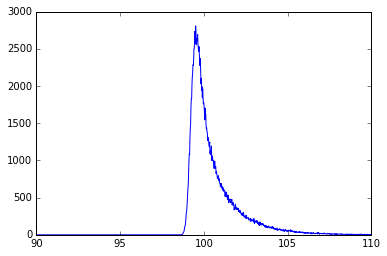

In [57]:
# check beam energy profile
import histogram.hdf as hh
ie = hh.load("beam/out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Step 3. Check and update sample assembly

In [18]:
%cd "{workdir}/sampleassembly"

/SNS/users/lj7/simulations/ARCS/phonon-demo/sampleassembly


In [20]:
# This was generated by mcvine workflow scaffolding using
# the chemical formula in Si.yml
!cat "./Si.xyz"

2
0.0 2.71526503565 2.71526503565	2.71526503565 0.0 2.71526503565	2.71526503565 2.71526503565 0.0
Si	0 0 0
Si	0 0 0


In [21]:
%%file Si.xyz
2
0.0 2.71526503565 2.71526503565	2.71526503565 0.0 2.71526503565	2.71526503565 2.71526503565 0.0
Si	-.125 -.125 -.125
Si	.125 .125 .125

Overwriting Si.xyz


In [22]:
# Also generated by mcvine workflow scaffolding.
!cat ./Si-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">


    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="16./angstrom"
	/>


    <Phonon_CoherentInelastic_SingleXtal_Kernel
      weight="1."
      orientation="0.816496580928,0.408248290464,-0.408248290464,0.0,-0.707106781187,-0.707106781187,-0.57735026919,0.57735026919,-0.57735026919"
      >
      <LinearlyInterpolatedDispersion idf-data-path="/SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/300K-50cube"/>
    </Phonon_CoherentInelastic_SingleXtal_Kernel>

    <!-- multiphonon kernel. uncomment and customize to enable -->
    <!--
    <MultiPhonon_Kernel
      Qmax="14/angstrom"
      dQ="0.05/angstrom"
      Emax="80*meV"
      weight="1."
      >
      <Linear

In [25]:
# So we make slight revisions to scatterer.xml

In [24]:
%%file ./Si-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">

    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="14./angstrom"
    weight="0.1"
	/>

    <Phonon_CoherentInelastic_SingleXtal_Kernel
      weight="1."
      orientation="0.816496580928,0.408248290464,-0.408248290464,0.0,-0.707106781187,-0.707106781187,-0.57735026919,0.57735026919,-0.57735026919"
      >
      <LinearlyInterpolatedDispersion idf-data-path="/SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/300K-50cube"/>
    </Phonon_CoherentInelastic_SingleXtal_Kernel>

    <!-- multiphonon kernel. uncomment and customize to enable -->
    <!--
    <MultiPhonon_Kernel
      Qmax="14/angstrom"
      dQ="0.05/angstrom"
      Emax="80*meV"
      weight="1."
      >
      <LinearlyInterpolatedDOS idf-path="/SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/300K-50cube/DOS"/>
    </MultiPhonon_Kernel>
    -->
    
  </KernelContainer>
  
</homogeneous_scatterer>

Overwriting ./Si-scatterer.xml


In [26]:
# confirm the changes
!cat Si-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
  mcweights="0, 1, 0.1"
  max_multiplescattering_loops="3"
  >
  
  <KernelContainer average="yes">

    <!-- a simple kernel for elastic scattering. more realistic kernel exists. -->
    <E_Q_Kernel 
	E_Q="1" 
	S_Q="1"
	Qmin="0./angstrom"
	Qmax="14./angstrom"
    weight="0.1"
	/>

    <Phonon_CoherentInelastic_SingleXtal_Kernel
      weight="1."
      orientation="0.816496580928,0.408248290464,-0.408248290464,0.0,-0.707106781187,-0.707106781187,-0.57735026919,0.57735026919,-0.57735026919"
      >
      <LinearlyInterpolatedDispersion idf-data-path="/SNS/users/linjiao/simulations/samples/Si/April2016-TSeries/300K-50cube"/>
    </Phonon_CoherentInelastic_SingleXtal_Kernel>

    <!-- multiphonon kernel. uncomment and customize to enable -->
    <!--
    <MultiPhonon_Kernel
      Qmax="14/angstrom"
      dQ="0.05/angstrom"
      Emax="80*meV"
      weight="1."
      

In [27]:
!ls .

sampleassembly.xml  Si-scatterer.xml  Si.xyz


## Step 4. Scattering

In [28]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/phonon-demo/scattering


In [29]:
!ls .

scripts  template


In [30]:
# configuration for the simulation deployment

In [31]:
%%file sim.yml

cluster:
  nodes: 10
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Writing sim.yml


In [32]:
# run simulation for one angle to verify it is working

In [33]:
! ./scripts/sim.py --angle=31.0

ln -s ../../beam
ln -s ../../sampleassembly
SAMPLE_ANGLE=31.0 time ./scatter >log.scatter 2>&1
time ./create-nxs >log.create-nxs 2>&1
cp sim.nxs sim_31.0.nxs
mcvine instruments arcs nxs populate_metadata --type=Ei --beam_outdir=beam/out --nxs=sim_31.0.nxs


In [37]:
# took 5min

In [34]:
# customize the simulation configuration for the full scan

In [38]:
%%file sim.yml

cluster:
  nodes: 30
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Overwriting sim.yml


In [39]:
# a script to create a submit script submit.sh
# may need to create several scripts

In [40]:
%%file create-run.py
import numpy as np
ostream = open('run.sh', 'wt')
for a in np.arange(-5, 90.1, 1.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-run.py


In [41]:
# run the script to create submit.sh
!python ./create-run.py

In [43]:
# to check the submit script, uncomment the following line and run it
#!cat run.sh

In [44]:
# make sure run.sh is executable
!chmod +x run.sh

In [ ]:
# start simulating the scan

In [45]:
!time ./run.sh >log.run

408808.53user 125950.26system 7:56:31elapsed 1870%CPU (0avgtext+0avgdata 979336maxresident)k
47373968inputs+1520outputs (2major+1550013368minor)pagefaults 0swaps


In [27]:
# Alternatively, the following will start the sim in the bg

In [ ]:
# %%script bash --bg
# ./run.sh
# this will take a while to finish.

## Step 5. Reduction

In [58]:
%cd "{workdir}/scattering"

/SNS/users/lj7/simulations/ARCS/phonon-demo/scattering


First we reduce event-mode nexus data for each angle using Mantid

In [48]:
# reduce tof events to E events
# this takes about 30 minutes
!time mcvine workflow sxr reduce --type batch \
    --eaxis 0 90 0.5 --psi-axis -5 90.1 1. --eiguess 100 \
    --eventnxs work_%s/sim_%s.nxs --out reduced_%s.nxs\
    > log.reduce

/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
13660.34user 371.65system 21:22.75elapsed 1093%CPU (0avgtext+0avgdata 5910432maxresident)k
1228512inputs+5552outputs (4major+94264219minor)pagefaults 0swaps


In [ ]:
# create configuration file for getting a slice

In [49]:
%%file slice_111.yml
Eaxis:
 min: 0
 max: 90
 N: 181
Q_projections:
 U:
  proj: -1,1,-1
  proj_name: -H,H,-H
  min: -6
  max: 6
  N: 241
 V:
  proj: 1,.5,-.5
  proj_name: H,0.5H,-0.5H
  min: -5.45
  max: -5.15
  N: 1
 W:
  proj: 0,-1,-1
  proj_name: 0,-K,-K
  min: -.3
  max: .3
  N: 1

Writing slice_111.yml


In [50]:
!time mcvine workflow sxr slice \
    --sample {workdir}/Si.yml \
    --psi-axis -5 90.1 1. \
    --nxs reduced_%s.nxs \
    --slice slice_111.yml \
    --out slice_111.nxs \
    > log.slice_111

/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
1324.39user 980.84system 3:31.54elapsed 1089%CPU (0avgtext+0avgdata 11556888maxresident)k
961808inputs+3040outputs (9major+16611581minor)pagefaults 0swaps


In [51]:
# convert slice nexus to slice histogram
!mcvine workflow sxr slice2hist slice_111.nxs slice_111.h5

/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/anaconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:13: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.98 seconds


plot z in (0, 1e-05)


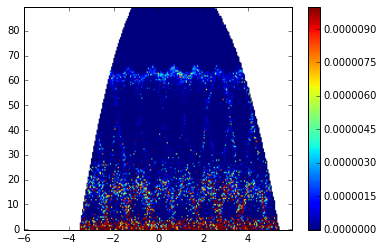

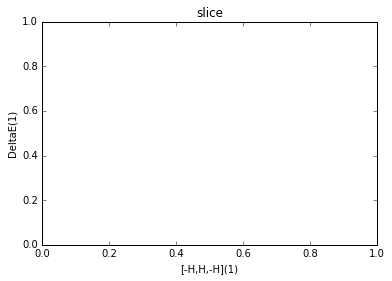

In [64]:
# plot
H.plot(hh.load("./slice_111.h5"), min=0, max=1e-5)